shap/shap-dp_small-hek293t-pe2max_epegrna.csv
shap/shap-dp_small-hek293t-nrch_pe2max.csv
shap/shap-dp_small-dld1-nrch_pe4max.csv
shap/shap-dp_small-hek293t-pe4max.csv
shap/shap-dp_small-a549-pe2max_epegrna.csv
shap/shap-dp_small-dld1-pe2max.csv
shap/shap-dp_small-a549-pe4max_epegrna.csv
shap/shap-dp-hek293t-pe2.csv
shap/shap-pd-adv-pe2.csv
shap/shap-pd-k562-pe2.csv
shap/shap-dp_small-hek293t-pe2max.csv
shap/shap-pd-k562mlh1dn-pe2.csv
shap/shap-dp_small-a549-pe2max.csv
shap/shap-dp_small-mda_mb_231-pe2.csv
shap/shap-dp_small-nih3t3-nrch_pe4max.csv
shap/shap-dp_small-hek293t-pe4max_epegrna.csv
shap/shap-dp_small-hek293t-nrch_pe2.csv
shap/shap-pd-hek293t-pe2.csv
shap/shap-dp_small-dld1-pe4max.csv
shap/shap-dp_small-a549-pe4max.csv
shap/shap-dp_small-hela-pe2max.csv
shap/shap-dp_small-hek293t-pe2.csv
shap/shap-dp_small-hct116-pe2.csv
(884102, 120)


/tmp/ipykernel_638521/1870700626.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[ind].set_xticklabels([int(i) if i == i and i <= 30 else i for i in ax[ind].get_xticks()])


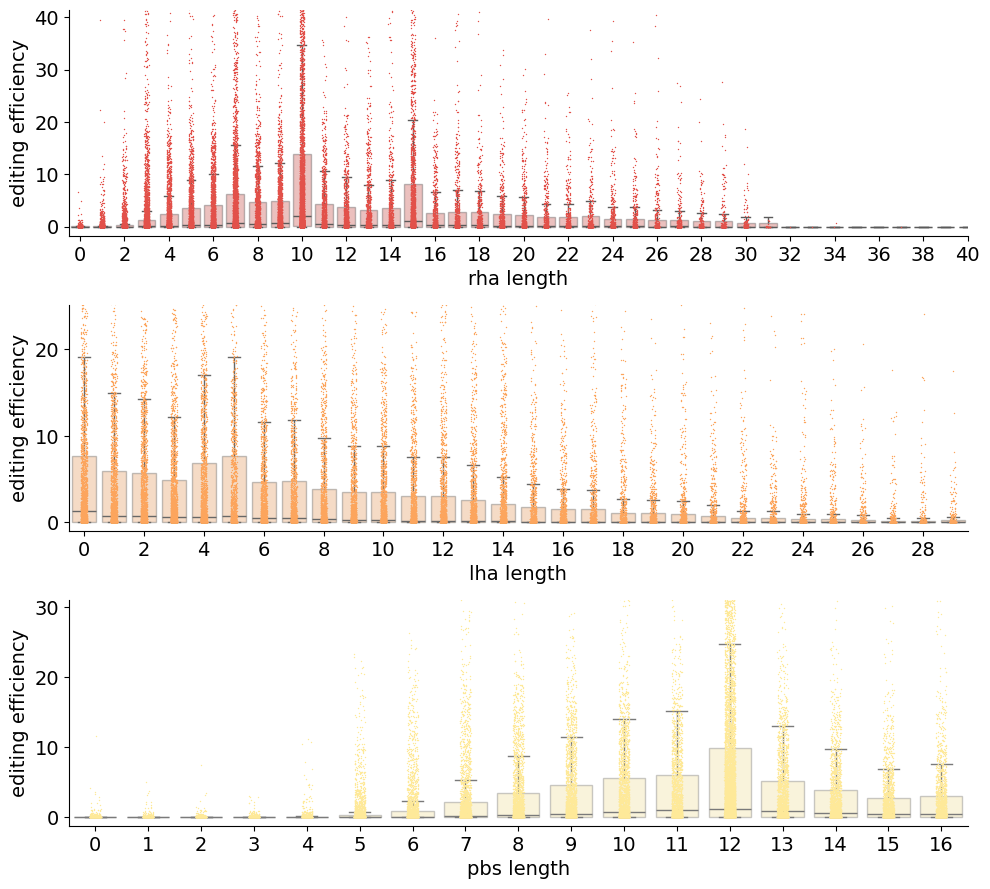

In [2]:
# investigate the lha length requirement for editing efficiency
import os
import sys
import pandas as pd
import itertools
from os.path import join as pjoin, dirname, abspath, basename
from glob import glob

# load up the shap analysis dataset for all the data and join then together
for file in glob(pjoin('shap', '*.csv')):
    if len(file.split('-')) > 4: continue
    print(file)
    if 'data' not in locals():
        data = pd.read_csv(file)
    else:
        data = pd.concat([data, pd.read_csv(file)])
        
print(data.shape)
data_sampled = data.sample(frac=0.05)
f_size = 14

# plot the mean editing efficiency for each lha length with error bars
import matplotlib.pyplot as plt
import seaborn as sns

# plot all data on the same plot
fig, ax = plt.subplots(3, 1, figsize=(10, 9))
palette = iter(sns.color_palette('Spectral', 6))

for ind, l in enumerate(['rha-length', 'lha-length', 'pbs-length']):
    # remove grid
    ax[ind].grid(False)
    # no top and right axis
    ax[ind].spines['top'].set_visible(False)
    ax[ind].spines['right'].set_visible(False)
    # plot as boxplot
    c = next(palette)
    sns.boxplot(x=l, y='editing-efficiency', data=data, ax=ax[ind], color=c, boxprops={'alpha': 0.4}, dodge=True, showfliers=False)
    # get the y limits
    y_min, y_max = ax[ind].get_ylim()
    # show samples of the data as stripplot
    
    sns.stripplot(x=l, y='editing-efficiency', data=data_sampled, ax=ax[ind], color=c,  dodge=True, size=1, jitter=True)
    # set the y limits
    ax[ind].set_ylim(y_min, y_max+5)
    ax[ind].set_xlim(-0.5, min(30, ax[ind].get_xlim()[1]))
    # remove the - in the labels
    ax[ind].set_xlabel(ax[ind].get_xlabel().replace('-', ' '))
    ax[ind].set_ylabel('editing efficiency')
    

    # if len(ax[ind].get_xticks()) > 20:
    #     ax[ind].set_xlim(-0.5, 20.5)
    if len(ax[ind].get_xticks()) > 20:
        # limit the amount of x ticks
        ax[ind].set_xticks(ax[ind].get_xticks()[::2])
        
    # x ticks labels need to be integers
    ax[ind].set_xticklabels([int(i) if i == i and i <= 30 else i for i in ax[ind].get_xticks()])
        

    # set the font size of the labels and ticks
    ax[ind].tick_params(axis='both', which='major', labelsize=f_size)
    ax[ind].set_xlabel(ax[ind].get_xlabel(), fontsize=f_size)
    ax[ind].set_ylabel(ax[ind].get_ylabel(), fontsize=f_size)

plt.tight_layout()
# save the figure
plt.savefig(pjoin('../../dissertation/figures', 'lha-rha-pbs-length-requirement.png'), dpi=300)

In [ ]:
# ==================================
# convert pd data of different cell types
# to std format, and then shap format
# ==================================
import sys
sys.path.append('../../')
from utils.data_utils import convert_to_SHAP
from os.path import join as pjoin
import pandas as pd

pridict_data = pjoin('std', 'pd-pe2.csv')
pridict_data = pd.read_csv(pridict_data)
# cell types
cell_lines = pridict_data['cell-line'].unique()

for cell_line in cell_lines:
    cell_line_data = pridict_data[pridict_data['cell-line'] == cell_line]
    cell_line_data.to_csv(pjoin('std',f'std-pd-pe2-{cell_line}.csv'), index=False)
    convert_to_SHAP(pjoin('std', f'std-pd-pe2-{cell_line}.csv'), pjoin('shap', f'shap-pd-pe2-{cell_line}.csv'), 'GG')

In [1]:
# Features to use for the study
# top 24 features in shap-dp-hek293t-pe2
import pandas as pd
from os.path import join as pjoin

shap_data = pd.read_csv(pjoin('shap', 'shap-dp-hek293t-pe2.csv'))
features = shap_data.columns
print(features[:24])

Index(['gc-count-pbs', 'rha-length', 'pbs-length', 'gc-count-extension',
       'melting-temperature-pbs', 'spcas9-score', 'lha-length',
       'maximal-length-of-consecutive-t-sequence', 'edit-type-replacement',
       'g-at-protospacer-position-16', 'gc-content-rha', 'pam-disrupted',
       'edit-length', 'c-at-protospacer-position-17',
       'melting-temperature-rha', 'minimum-free-energy-extension',
       'a-at-protospacer-position-13', 'a-at-protospacer-position-14',
       't-at-protospacer-position-16', 'gc-content-extension', 'gc-count-rha',
       'g-at-protospacer-position-15', 'g-at-protospacer-position-19',
       'gc-content-pbs'],
      dtype='object')


## Check the distribution of editing efficiency values

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f_size = 14

def plot_histogram(dp_data, pridict_hek_data, pridict_k562_data, pridict_k562mlh1d_data, pridict_adv_data, bin_min: int = 0, bin_max: int = 100, bin_width: int = 10, legend: bool = True):
    lbins = np.arange(bin_min, bin_max, bin_width)
    # plot the editing-efficiency of the five datasets in a histogram
    # prebin the editing efficiency
    dp_data['editing-efficiency'] = pd.cut(dp_data['editing-efficiency'], bins=lbins)
    pridict_hek_data['editing-efficiency'] = pd.cut(pridict_hek_data['editing-efficiency'], bins=lbins)
    pridict_k562_data['editing-efficiency'] = pd.cut(pridict_k562_data['editing-efficiency'], bins=lbins)
    pridict_k562mlh1d_data['editing-efficiency'] = pd.cut(pridict_k562mlh1d_data['editing-efficiency'], bins=lbins)
    pridict_adv_data['editing-efficiency'] = pd.cut(pridict_adv_data['editing-efficiency'], bins=lbins)

    binned_dp_data = dp_data.groupby('editing-efficiency', observed=False).size().reset_index(name='count')
    binned_pridict_hek_data = pridict_hek_data.groupby('editing-efficiency', observed=False).size().reset_index(name='count')
    binned_pridict_k562_data = pridict_k562_data.groupby('editing-efficiency', observed=False).size().reset_index(name='count')
    binned_pridict_k562mlh1d_data = pridict_k562mlh1d_data.groupby('editing-efficiency', observed=False).size().reset_index(name='count')
    binned_pridict_adv_data = pridict_adv_data.groupby('editing-efficiency', observed=False).size().reset_index(name='count')

    interval = bin_width * 0.18
    # get the left point of the pandas interval
    binned_dp_data['editing-efficiency'] = binned_dp_data['editing-efficiency'].apply(lambda x: x.left)
    binned_pridict_hek_data['editing-efficiency'] = binned_pridict_hek_data['editing-efficiency'].apply(lambda x: x.left + 1 * interval)
    binned_pridict_k562_data['editing-efficiency'] = binned_pridict_k562_data['editing-efficiency'].apply(lambda x: x.left + 2 * interval)
    binned_pridict_k562mlh1d_data['editing-efficiency'] = binned_pridict_k562mlh1d_data['editing-efficiency'].apply(lambda x: x.left + 3 * interval)
    binned_pridict_adv_data['editing-efficiency'] = binned_pridict_adv_data['editing-efficiency'].apply(lambda x: x.left + 4 * interval)


    # plot all data on the same plot, but different y axis for the deep prime data
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    palette = iter(sns.color_palette('Spectral', 6))

    # remove grid
    ax.grid(False)
    # no top and right axis
    ax.spines['top'].set_visible(False)
    # two x axis
    ax2 = ax.twinx()
    ax2.spines['top'].set_visible(False)

    ax2.set_ylabel('PRIDICT editing efficiency')
    ax.set_ylabel('DeepPrime editing efficiency')

    # plot as barplot with mutliple categories
    bar_width = interval
    c = next(palette)
    ax.bar(binned_dp_data['editing-efficiency'], binned_dp_data['count'], color=c, label='DP', width=bar_width)
    c = next(palette)
    ax2.bar(binned_pridict_hek_data['editing-efficiency'], binned_pridict_hek_data['count'], color=c, label='PD HEK293T', width=bar_width)
    c = next(palette)
    ax2.bar(binned_pridict_k562_data['editing-efficiency'], binned_pridict_k562_data['count'], color=c, label='PD K562', width=bar_width)
    c = next(palette)
    ax2.bar(binned_pridict_k562mlh1d_data['editing-efficiency'], binned_pridict_k562mlh1d_data['count'], color=c, label='PD K562MLH1D', width=bar_width)
    c = next(palette)
    ax2.bar(binned_pridict_adv_data['editing-efficiency'], binned_pridict_adv_data['count'], color=c, label='PD ADV', width=bar_width)

    ax.tick_params(axis='both', which='major', labelsize=f_size)
    ax2.tick_params(axis='both', which='major', labelsize=f_size)
    ax.set_xlabel('Editing Efficiency', fontsize=f_size)
    ax.set_ylabel('DeepPrime Count', fontsize=f_size)
    ax2.set_ylabel('PRIDICT Count', fontsize=f_size)

    # set the font size of the labels and ticks
    ax.tick_params(axis='both', which='major', labelsize=f_size)
    ax2.tick_params(axis='both', which='major', labelsize=f_size)
    ax.set_xlabel('Editing Efficiency', fontsize=f_size)
    ax.set_ylabel('DeepPrime Count', fontsize=f_size)
    ax2.set_ylabel('PRIDICT Count', fontsize=f_size)
    
    if legend:
        # merge the legends
        handles, labels = ax.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(handles + handles2, labels + labels2, loc='upper right', fontsize=f_size)

    plt.tight_layout()

In [ ]:
# load up the four main datasets
import pandas as pd
from os.path import join as pjoin


# load the data
dp_data = pd.read_csv(pjoin('std', 'std-dp-hek293t-pe2.csv'))
pridict_hek_data = pd.read_csv(pjoin('std', 'std-pd-hek293t-pe2.csv'))
pridict_k562_data = pd.read_csv(pjoin('std', 'std-pd-k562-pe2.csv'))
pridict_k562mlh1d_data = pd.read_csv(pjoin('std', 'std-pd-k562mlh1d-pe2.csv'))
pridict_adv_data = pd.read_csv(pjoin('std', 'std-pd-adv-pe2.csv'))

# plot the editing-efficiency of the four datasets in a histogram
import numpy as np

plot_histogram(dp_data, pridict_hek_data, pridict_k562_data, pridict_k562mlh1d_data, pridict_adv_data, bin_min=0, bin_max=100, bin_width=10, legend=True)

# figure title at the bottom
# plt.figtext(0.5, 0.01, '(a) Original', ha='center', va='center', fontsize=f_size)

# save the figure
plt.savefig(pjoin('../../dissertation/figures', 'editing-efficiency-comparison.png'), dpi=300)

In [ ]:
# log adjusted
import pandas as pd
from os.path import join as pjoin
import numpy as np

# load the data
dp_data = pd.read_csv(pjoin('std', 'std-dp-hek293t-pe2.csv'))
pridict_hek_data = pd.read_csv(pjoin('std', 'std-pd-hek293t-pe2.csv'))
pridict_k562_data = pd.read_csv(pjoin('std', 'std-pd-k562-pe2.csv'))
pridict_k562mlh1d_data = pd.read_csv(pjoin('std', 'std-pd-k562mlh1d-pe2.csv'))
pridict_adv_data = pd.read_csv(pjoin('std', 'std-pd-adv-pe2.csv'))

# plot the editing-efficiency of the four datasets in a histogram
import matplotlib.pyplot as plt
import seaborn as sns

# log adjust the editing efficiency
dp_data['editing-efficiency'] = np.log1p(dp_data['editing-efficiency'])
pridict_hek_data['editing-efficiency'] = np.log1p(pridict_hek_data['editing-efficiency'])
pridict_k562_data['editing-efficiency'] = np.log1p(pridict_k562_data['editing-efficiency'])
pridict_k562mlh1d_data['editing-efficiency'] = np.log1p(pridict_k562mlh1d_data['editing-efficiency'])
pridict_adv_data['editing-efficiency'] = np.log1p(pridict_adv_data['editing-efficiency'])

plot_histogram(dp_data, pridict_hek_data, pridict_k562_data, pridict_k562mlh1d_data, pridict_adv_data, bin_min=0, bin_max=5, bin_width=0.5, legend=False)

# save the figure
plt.savefig(pjoin('../../dissertation/figures', 'editing-efficiency-log-adjusted.png'), dpi=300)

In [ ]:
# undersampling the data with low editing efficiency
import pandas as pd
from os.path import join as pjoin
import numpy as np

# load the data
dp_data = pd.read_csv(pjoin('std', 'std-dp-hek293t-pe2.csv'))
pridict_hek_data = pd.read_csv(pjoin('std', 'std-pd-hek293t-pe2.csv'))
pridict_k562_data = pd.read_csv(pjoin('std', 'std-pd-k562-pe2.csv'))
pridict_k562mlh1d_data = pd.read_csv(pjoin('std', 'std-pd-k562mlh1d-pe2.csv'))
pridict_adv_data = pd.read_csv(pjoin('std', 'std-pd-adv-pe2.csv'))

# undersample the low editing efficiency data
def undersample(df: pd.DataFrame, frac: float, threshold: int) -> pd.DataFrame:
    df_low = df[df['editing-efficiency'] < 10]
    df_high = df[df['editing-efficiency'] >= 10]
    df_low = df_low.sample(frac=frac)
    return pd.concat([df_low, df_high])

dp_data = undersample(dp_data, 0.1, 10)
pridict_hek_data = undersample(pridict_hek_data, 0.1, 10)
pridict_k562_data = undersample(pridict_k562_data, 0.1, 10)
pridict_k562mlh1d_data = undersample(pridict_k562mlh1d_data, 0.1, 10)
pridict_adv_data = undersample(pridict_adv_data, 0.1, 10)


plot_histogram(dp_data, pridict_hek_data, pridict_k562_data, pridict_k562mlh1d_data, pridict_adv_data, bin_min=0, bin_max=100, bin_width=10, legend=False)

# save the figure
plt.savefig(pjoin('../../dissertation/figures', 'editing-efficiency-undersample.png'), dpi=300)

In [ ]:
# qunatile transform the data
import pandas as pd
from os.path import join as pjoin
import numpy as np

# load the data
dp_data = pd.read_csv(pjoin('std', 'std-dp-hek293t-pe2.csv'))
pridict_hek_data = pd.read_csv(pjoin('std', 'std-pd-hek293t-pe2.csv'))
pridict_k562_data = pd.read_csv(pjoin('std', 'std-pd-k562-pe2.csv'))
pridict_k562mlh1d_data = pd.read_csv(pjoin('std', 'std-pd-k562mlh1d-pe2.csv'))
pridict_adv_data = pd.read_csv(pjoin('std', 'std-pd-adv-pe2.csv'))

# quantile transform the editing efficiency
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=1000, output_distribution='uniform')
dp_data['editing-efficiency'] = qt.fit_transform(dp_data['editing-efficiency'].values.reshape(-1, 1))
pridict_hek_data['editing-efficiency'] = qt.transform(pridict_hek_data['editing-efficiency'].values.reshape(-1, 1))
pridict_k562_data['editing-efficiency'] = qt.transform(pridict_k562_data['editing-efficiency'].values.reshape(-1, 1))
pridict_k562mlh1d_data['editing-efficiency'] = qt.transform(pridict_k562mlh1d_data['editing-efficiency'].values.reshape(-1, 1))
pridict_adv_data['editing-efficiency'] = qt.transform(pridict_adv_data['editing-efficiency'].values.reshape(-1, 1))

plot_histogram(dp_data, pridict_hek_data, pridict_k562_data, pridict_k562mlh1d_data, pridict_adv_data, bin_min=-0.3, bin_max=1.3, bin_width=0.16, legend=False)

# save the figure
plt.savefig(pjoin('../../dissertation/figures', 'editing-efficiency-quantile-transform.png'), dpi=300)


In [ ]:
# comparing the performance of XGBoost model trained on the adjusted datasets
# with 5 fold cross validation
import scipy.stats
import xgboost as xgb
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
import scipy
from sklearn.preprocessing import QuantileTransformer
import pandas as pd
from collections import defaultdict
from os.path import join as pjoin
import torch

performance = {}

def undersample(df: pd.DataFrame, frac: float, threshold: int) -> pd.DataFrame:
    df_low = df[df['editing-efficiency'] < 10]
    df_high = df[df['editing-efficiency'] >= 10]
    df_low = df_low.sample(frac=frac)
    return pd.concat([df_low, df_high])

adjustment_shorthands = {
    'weighted-mse': 'WMSE',
    'quantile-transform': 'QT',
    'original': 'OG',
    'log-adjusted': 'LA',
    'undersample': 'US'
}

for adjustment in ['weighted-mse', 'quantile-transform','original', 'log-adjusted', 'undersample']:
    print(adjustment)
    correlation = defaultdict(list)
    for data_file in ['ml-dp-hek293t-pe2.csv', 'ml-pd-hek293t-pe2.csv', 'ml-pd-k562-pe2.csv', 'ml-pd-k562mlh1d-pe2.csv', 'ml-pd-adv-pe2.csv']:
        print(data_file)
        data = pd.read_csv(pjoin('conventional-ml', data_file))
        if adjustment == 'log-adjusted':
            data['editing-efficiency'] = np.log1p(data['editing-efficiency'])
        elif adjustment == 'undersample':
            data = undersample(data, 0.1, 10)
        elif adjustment == 'quantile-transform':
            qt = QuantileTransformer(n_quantiles=1000, output_distribution='uniform')
            data['editing-efficiency'] = qt.fit_transform(data['editing-efficiency'].values.reshape(-1, 1))

        for fold in range(5):
            print(f'Fold: {fold+1}')
            train = data[data['fold'] == fold]
            test = data[data['fold'] != fold]
            
            print(train.columns)
            
            train_features = train.iloc[:, :24].values
            train_targets = train['editing-efficiency'].values
            test_features = test.iloc[:, :24].values
            test_targets = test['editing-efficiency'].values
            
            sample_weights = np.clip(np.exp(6 * (np.log(train_targets + 1) - 3) + 1), 0, 5)
            
            model = xgb.XGBRegressor(verbosity=2, max_depth=3, n_estimators=200)
            if adjustment == 'weighted-mse':
                model.fit(train_features, train_targets, sample_weight=np.clip(np.exp(6 * (np.log(train_targets + 1) - 3) + 1), 0, 5))
            else:
                model.fit(train_features, train_targets)
            
            # evaluate
            results = model.predict(test_features)
            # flatten the results
            results = results.flatten()
            
            if adjustment == 'log-adjusted':
                results = np.expm1(results)
            elif adjustment == 'quantile-transform':
                results = qt.inverse_transform(results.reshape(-1, 1))
                results = results.flatten()
            pearson = np.corrcoef(test_targets, results)[0, 1]
            spearman = scipy.stats.spearmanr(test_targets, results)[0]
            print(f'Pearson: {pearson}, Spearman: {spearman}')
            correlation[data_file.split('.')[0]].append((pearson, spearman))
            
    performance[adjustment_shorthands[adjustment]] = correlation
    
# save the performance
performance = pd.DataFrame(performance)
print(performance)
performance.to_csv(pjoin('performance', 'xgboost-performance.csv'))

In [ ]:
# plot both the pearson and spearman correlation performance
# each figure contains the performance of the model on the different datasets
import pandas as pd
import numpy as np
from os.path import join as pjoin
import matplotlib.pyplot as plt
import seaborn as sns
import ast

performance = pd.read_csv(pjoin('performance', 'xgboost-performance.csv'), index_col=0)
f_size = 14
palette = iter(sns.color_palette('Spectral', 10))

for data in ['ml-dp-hek293t-pe2', 'ml-pd-hek293t-pe2', 'ml-pd-k562-pe2', 'ml-pd-k562mlh1d-pe2', 'ml-pd-adv-pe2']:
    # plot the performance of the model on the different datasets
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    
    performance_data = performance.loc[data]
    performance_data = performance_data.apply(lambda x: ast.literal_eval(x))
    # split performance data into pearson and spearman
    performance_pearson = performance_data.apply(lambda x: [i[0] for i in x])
    performance_spearman = performance_data.apply(lambda x: [i[1] for i in x])
    performance_data = [performance_pearson, performance_spearman]
    

    for ind, metric in enumerate(['pearson', 'spearman']):
        # remove grid
        ax[ind].grid(False)
        # no top and right axis
        ax[ind].spines['top'].set_visible(False)
        ax[ind].spines['right'].set_visible(False)
        # plot as boxplot
        c = next(palette)
        print(performance_data[ind].apply(lambda x: np.mean(x)))
        sns.barplot(data=performance_data[ind].apply(lambda x: np.mean(x)), ax=ax[ind], color=c)
        # get the y limits
        y_min, y_max = ax[ind].get_ylim()
        # show samples of the data as stripplot
        sns.stripplot(data=performance_data[ind], ax=ax[ind], color=c,  dodge=True, size=1, jitter=True)
        # set the y limits
        ax[ind].set_ylim(y_min, y_max)
        # remove the - in the labels
        ax[ind].set_xlabel(ax[ind].get_xlabel().replace('-', ' '))
        ax[ind].set_ylabel(f'{metric} correlation')

        # set the font size of the labels and ticks
        ax[ind].tick_params(axis='both', which='major', labelsize=f_size)
        ax[ind].set_xlabel(ax[ind].get_xlabel(), fontsize=f_size)
        ax[ind].set_ylabel(ax[ind].get_ylabel(), fontsize=f_size)
        
        # rotate the x labels
        ax[ind].tick_params(axis='x', rotation=30)
        ax[ind].set_xticklabels(ax[ind].get_xticklabels(), rotation=30)
        
    plt.tight_layout()
